<a href="https://colab.research.google.com/github/hinatanvir/Fault-Detection-SECOM/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import os 

In [44]:
#Function adding value label to each bar 
def add_value_labels(ax, spacing):
    """Add labels to the end of each bar in a bar chart.

    Arguments:
        ax (matplotlib.axes.Axes): The matplotlib object containing the axes
            of the plot to annotate.
        spacing (int): The distance between the labels and the bars.
    """

    # For each bar: Place a label
    for rect in ax.patches:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = spacing
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        # Use Y value as label and format number with one decimal place
        label = "{:.1f}".format(y_value)

        # Create annotation
        ax.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va)                      # Vertically align label differently for
                                        # positive and negative values.


In [3]:
path1='https://raw.githubusercontent.com/hinatanvir/Fault-Detection-SECOM/main/secom.data?token=GHSAT0AAAAAABTMJQPCMEYJ4LIGT2V6TRG2YSS5ZWA'

In [4]:
data = pd.read_csv(path1,delimiter=' ',header=None)

In [5]:
path2='https://raw.githubusercontent.com/hinatanvir/Fault-Detection-SECOM/main/secom_labels.data?token=GHSAT0AAAAAABTMJQPCJP4OZMM573LK4Q7UYSS562A'

In [6]:
label=pd.read_csv(path2,delimiter=' ',header=None)

In [7]:
data.columns = ['feature'+str(x+1) for x in range(len(data.columns))]

In [8]:
label.columns=['status','timestamp']

In [9]:
#converting timestamp to datetime format, dayfirst=True arg ensures days and month dont switch 
#for dates lesser than 13 
label['timestamp']=pd.to_datetime(label['timestamp'],dayfirst=True)

In [10]:
#dictionary for EDA
result={}

In [11]:
for col in data.columns:
    mean=data[col].mean()
    std= data[col].std()
    percent_null= pd.isnull(data[col]).sum()/len(data[col])*100
    unique=len(pd.unique(data[col]))
    outlier_df3= data[(np.abs(stats.zscore(data[col])) > 3)]
    outlier_df2= data[(np.abs(stats.zscore(data[col])) > 2)]
    count_3s=len(outlier_df3)
    count_2s=len(outlier_df2)
    min= data[col].min()
    q25=data[col].quantile(0.25)
    q50=data[col].quantile(0.5)
    q75=data[col].quantile(0.75)
    max= data[col].max()
    list = []
    list.append(mean)
    list.append(std)
    list.append(percent_null)
    list.append(unique)
    list.append(count_3s)
    list.append(count_2s)
    list.append(min)
    list.append(q25)
    list.append(q50)
    list.append(q75)
    list.append(max)
    result[col] = list

In [ ]:
result

In [13]:
result1=pd.DataFrame.from_dict(result,orient='index') 

In [14]:
result1.columns=['mean','std', 'percent_null', 'unique', 'count_3s', 'count_2s', 'min', 'q25', 'q50', 'q75', 'max']

In [15]:
result1

,mean,std,percent_null,unique,count_3s,count_2s,min,q25,q50,q75,max
feature1,3014.452896,73.621787,0.382897,1521,0,0,2743.2400,2966.260000,3011.49000,3056.650000,3356.3500
feature2,2495.850231,80.407705,0.446713,1505,0,0,2158.7500,2452.247500,2499.40500,2538.822500,2846.4400
feature3,2200.547318,29.513152,0.893427,508,0,0,2060.6600,2181.044400,2201.06670,2218.055500,2315.2667
feature4,1396.376627,441.691640,0.893427,519,0,0,0.0000,1081.875800,1285.21440,1591.223500,3715.0417
feature5,4.197013,56.355540,0.893427,504,0,0,0.6815,1.017700,1.31680,1.525700,1114.5366
...,...,...,...,...,...,...,...,...,...,...,...
feature586,3.067826,3.578033,0.063816,1503,0,0,1.1975,2.306500,2.75765,3.295175,99.3032
feature587,0.021458,0.012358,0.063816,323,0,0,-0.0169,0.013425,0.02050,0.027600,0.1028
feature588,0.016475,0.008808,0.063816,261,0,0,0.0032,0.010600,0.01480,0.020300,0.0799
feature589,0.005283,0.002867,0.063816,121,0,0,0.0010,0.003300,0.00460,0.006400,0.0286


In [18]:
#frequency distribution of percent_null
result1.percent_null.value_counts(ascending=False)

0.382897     100
0.063816      92
0.127632      84
0.000000      52
0.574346      48
1.531589      43
0.191449      24
0.255265      24
0.893427      20
0.446713      20
0.510530      12
16.592214     12
64.964901     12
17.421825      8
3.254627       8
91.193363      4
50.670070      4
45.628590      4
85.577537      4
0.765795       4
0.638162       4
60.561583      4
0.319081       3
Name: percent_null, dtype: int64

In [16]:
tranform=result1.copy(deep=True)

In [ ]:
tranform

In [57]:
#bins = [0, 25, 50, 75, 100]
#labels =[1,2,3,4]
#pd.cut(df1['Score'], bins,labels=labels)
bins_null=[0,1,5,20,55,75,95]
labels_null=['>=1','1-5','5 -20','20-55','55-75','75-95']
tranform['null_bin']= pd.cut(tranform['percent_null'], bins_null,labels=labels_null,right=True)

In [40]:
null_counts= tranform['null_bin'].value_counts().sort_index()# sort_index to sort the left column of rows 
#pd.crosstab(index=tranform["null_bin"], columns="count")

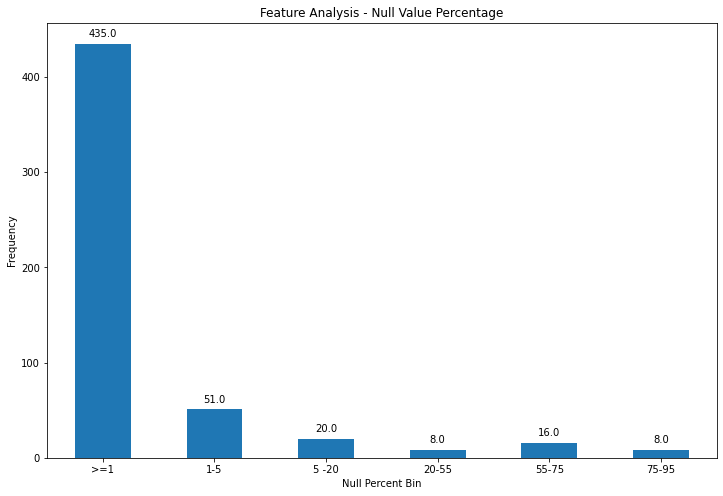

In [63]:
plt.figure(figsize=(12, 8))
# bar Graph for Null value categories 
ax = null_counts.plot(kind="bar")
ax.set_title('Feature Analysis - Null Value Percentage')
ax.set_xlabel('Null Percent Bin')
ax.set_ylabel('Frequency')
ax.set_xticklabels(labels_null,rotation=0)
#call function to add labels to null values bar chart
add_value_labels(ax,5)
plt.show()

In [33]:
plt.show()

In [34]:
plt.savefig("image.png")

<Figure size 432x288 with 0 Axes>

In [ ]:
#result1[result1['count_3s'] > 0] # 52 features with outliers
#result1[result1['unique'] < 4] # 122 , 116 features only 2 unique values
#len(result1[result1['percent_null'] > 55]) # 24 features with null values greater than 55%

In [ ]:
desc=data.describe()

In [ ]:
desc

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,...,feature581,feature582,feature583,feature584,feature585,feature586,feature587,feature588,feature589,feature590
count,1561.000000,1560.000000,1553.000000,1553.000000,1553.000000,1553.0,1553.000000,1558.000000,1565.000000,1565.000000,...,618.000000,618.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000
mean,3014.452896,2495.850231,2200.547318,1396.376627,4.197013,100.0,101.112908,0.121822,1.462862,-0.000841,...,0.005396,97.934373,0.500096,0.015318,0.003847,3.067826,0.021458,0.016475,0.005283,99.670066
std,73.621787,80.407705,29.513152,441.691640,56.355540,0.0,6.237214,0.008961,0.073897,0.015116,...,0.003116,87.520966,0.003404,0.017180,0.003720,3.578033,0.012358,0.008808,0.002867,93.891919
min,2743.240000,2158.750000,2060.660000,0.000000,0.681500,100.0,82.131100,0.000000,1.191000,-0.053400,...,0.001000,0.000000,0.477800,0.006000,0.001700,1.197500,-0.016900,0.003200,0.001000,0.000000
25%,2966.260000,2452.247500,2181.044400,1081.875800,1.017700,100.0,97.920000,0.121100,1.411200,-0.010800,...,0.003400,46.184900,0.497900,0.011600,0.003100,2.306500,0.013425,0.010600,0.003300,44.368600
50%,3011.490000,2499.405000,2201.066700,1285.214400,1.316800,100.0,101.512200,0.122400,1.461600,-0.001300,...,0.004700,72.288900,0.500200,0.013800,0.003600,2.757650,0.020500,0.014800,0.004600,71.900500
75%,3056.650000,2538.822500,2218.055500,1591.223500,1.525700,100.0,104.586700,0.123800,1.516900,0.008400,...,0.006475,116.539150,0.502375,0.016500,0.004100,3.295175,0.027600,0.020300,0.006400,114.749700
max,3356.350000,2846.440000,2315.266700,3715.041700,1114.536600,100.0,129.252200,0.128600,1.656400,0.074900,...,0.028600,737.304800,0.509800,0.476600,0.104500,99.303200,0.102800,0.079900,0.028600,737.304800


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f24b23a9850>,
      dtype=object)

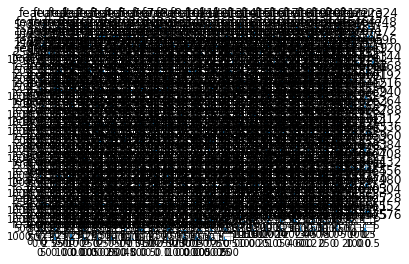

In [14]:
#see distribtion of all the features 
data.hist()